In [36]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt 
import matplotlib


In [37]:
result_dir = 'records_emb_200'
data = []

for file in os.listdir(result_dir):
    df = pd.read_csv(os.path.join(result_dir, file, 'result.csv'), engine='python')    
    df = df.iloc[1:].fillna(0)
    df['dataset'] = file.split('-')[1]
    df['emb'] = file.split('-')[9]
    data.append(df)

In [38]:
data = pd.concat(data)
# data = data[data['model']=='our-lasso'].reset_index(drop=True)
data = data.reset_index(drop=True)
data['dataset'] = data['dataset'].replace('CNN', '20NG')
data['emb'] = data['emb'].replace('glove', 'Glove')
data['emb'] = data['emb'].replace('fasttext', 'fastText')
data['emb'] = data['emb'].replace('doc2vecC', 'Doc2vecC')

data['model'] = data['model'].replace('sk-linear-regression', 'LR')
data['model'] = data['model'].replace('sk-lasso', 'Lasso+')
data['model'] = data['model'].replace('sk-omp', 'OMP')
data['model'] = data['model'].replace('our-lasso', 'CLasso')
data

,F1@10,F1@30,F1@50,model,percision@10,recall@10,percision@30,recall@30,percision@50,recall@50,ndcg@10,ndcg@30,ndcg@50,ndcg@all,dataset,emb
0,0.374510,0.371815,0.372551,LR,0.374510,0.374510,0.371815,0.371815,0.372551,0.372551,0.597225,0.542035,0.541916,0.695781,20NG,Doc2vecC
1,0.684970,0.712433,0.711197,Lasso+,0.684970,0.684970,0.712433,0.712433,0.711197,0.711197,0.865332,0.826314,0.807136,0.874521,20NG,Doc2vecC
2,0.395005,0.341935,0.330784,OMP,0.395005,0.395005,0.341935,0.341935,0.330784,0.330784,0.600640,0.506930,0.490287,0.644125,20NG,Doc2vecC
3,0.626322,0.661502,0.658096,BPDN,0.626322,0.626322,0.661502,0.661502,0.658096,0.658096,0.829486,0.782896,0.766259,0.850486,20NG,Doc2vecC
4,0.777978,0.795188,0.807037,CLasso,0.777978,0.777978,0.795188,0.795188,0.807037,0.807037,0.919373,0.901007,0.885091,0.928557,20NG,Doc2vecC
5,0.410839,0.309901,0.288523,LR,0.410839,0.410839,0.309901,0.309901,0.288523,0.288523,0.674385,0.589820,0.580902,0.742132,20NG,Glove
6,0.760660,0.704855,0.670587,Lasso+,0.760660,0.760660,0.704855,0.704855,0.670587,0.670587,0.925413,0.871883,0.845462,0.906079,20NG,Glove
7,0.375462,0.243446,0.222108,OMP,0.375462,0.375462,0.243446,0.243446,0.222108,0.222108,0.581179,0.472829,0.451526,0.616597,20NG,Glove
8,0.652519,0.579612,0.551191,BPDN,0.652519,0.652519,0.579612,0.579612,0.551191,0.551191,0.864974,0.792595,0.773741,0.869546,20NG,Glove
9,0.811363,0.764002,0.725730,CLasso,0.811363,0.811363,0.764002,0.764002,0.725730,0.725730,0.954985,0.909882,0.880678,0.935183,20NG,Glove


In [39]:
# data = data.append(data.iloc[2]).reset_index(drop=True)
# data = data.drop(2)
# data

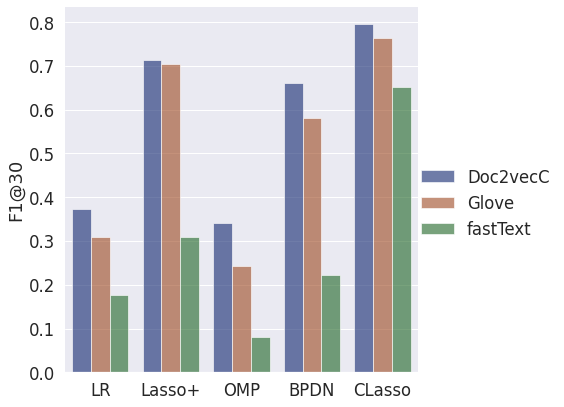

In [40]:
import seaborn as sns

sns.set(font_scale = 1.5)

g = sns.catplot(
    data=data, kind="bar",
    x="model", y="F1@30", hue="emb",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
g.set(xlabel=None)
g.savefig('emb-NDCG.pdf',bbox_inches='tight',pad_inches=0.0)#,dpi=fig.dpi

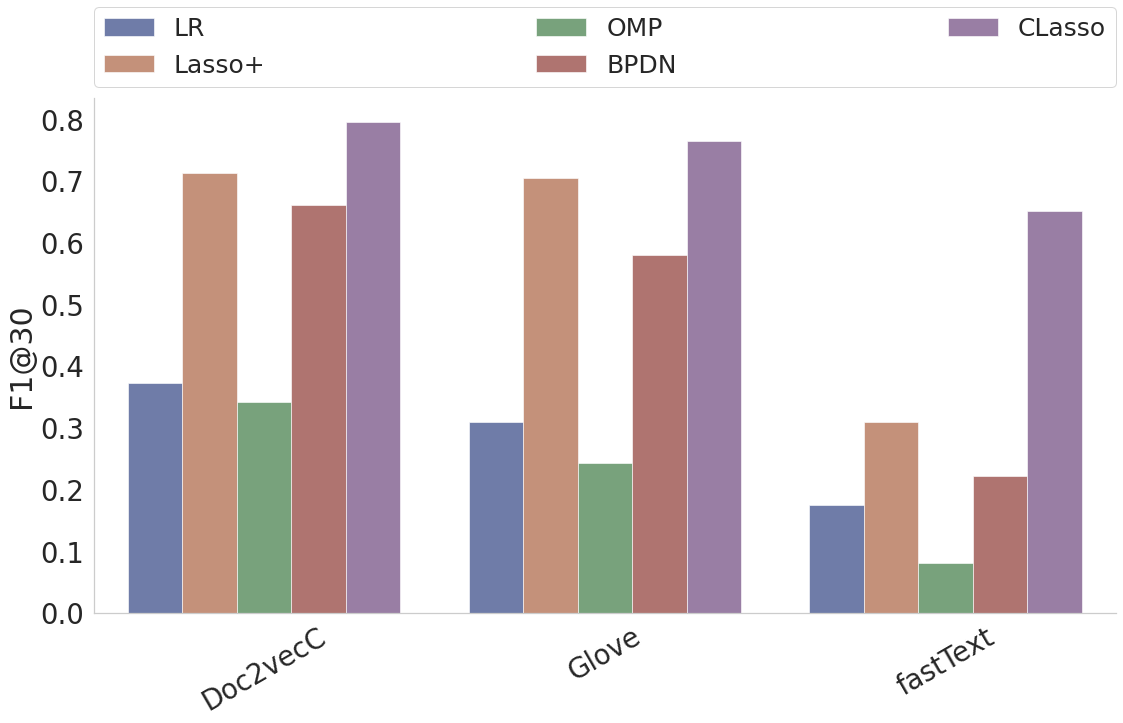

In [48]:
import seaborn as sns
sns.set(font_scale = 2.5)
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.catplot(
    data=data, kind="bar",
    x="emb", y="F1@30", hue="model",
    ci="sd", palette="dark", alpha=.6, #height=6
    legend=False,
)
g.fig.set_size_inches(25,10)
plt.xticks(rotation=30)
g.set_xlabels("")
plt.legend(fontsize=25,markerscale=0.7,bbox_to_anchor=(0, 1.02, 1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
# plt.ylim(0.,0.5)
plt.savefig('emb-F1.pdf',bbox_inches='tight',dpi=g.fig.dpi,pad_inches=0.1)

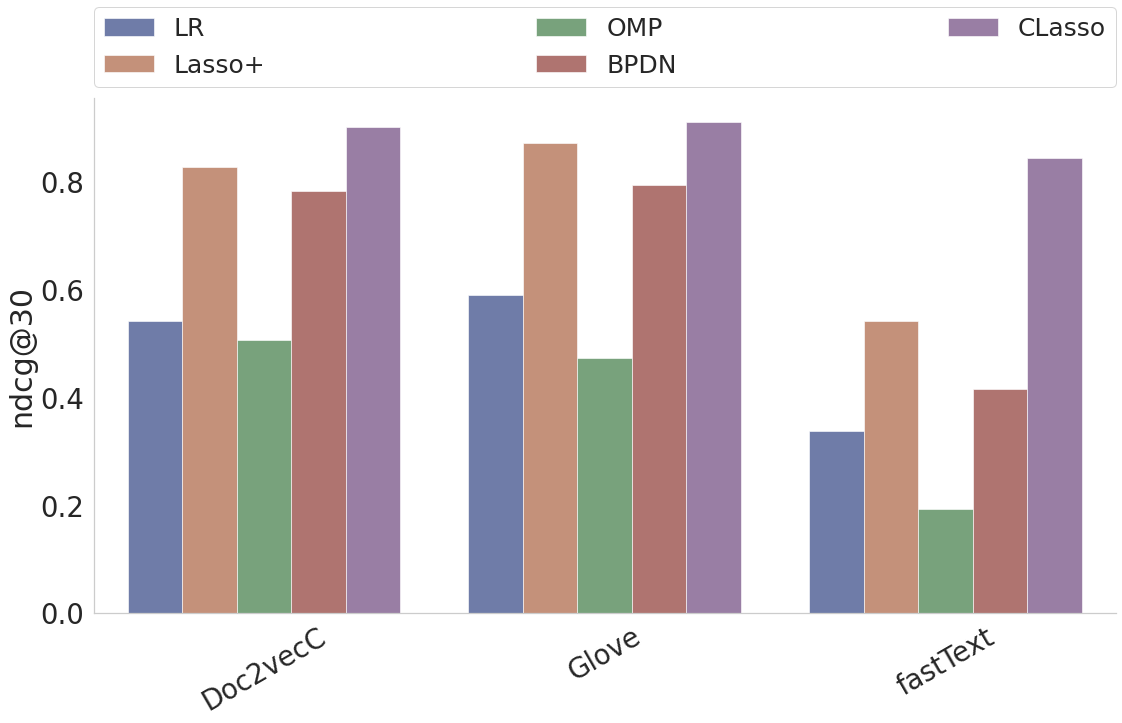

In [50]:
import seaborn as sns
sns.set(font_scale = 2.5)
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.catplot(
    data=data, kind="bar",
    x="emb", y="ndcg@30", hue="model",
    ci="sd", palette="dark", alpha=.6, #height=6
    legend=False,
)
g.fig.set_size_inches(25,10)
plt.xticks(rotation=30)
g.set_xlabels("")
plt.legend(fontsize=25,markerscale=0.7,bbox_to_anchor=(0, 1.02, 1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
# plt.ylim(0.,0.5)
plt.savefig('emb-NDCG.pdf',bbox_inches='tight',dpi=g.fig.dpi,pad_inches=0.1)

In [10]:
downstream = {}
downstream[50] = 0.5626
downstream[100] = 0.6175
downstream[200] = 0.6658
downstream[300] = 0.6860


In [ ]:
downstream